In [1]:
# import libraries

%matplotlib inline

# Some usual imports here
import csv as csv 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn    
import datetime

In [2]:
#load data
house = pd.read_csv('Melbourne_housing_FULL.csv')
pd.set_option('display.max_columns', None) #in order to display all the var/columns
house.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
# displaying and checking variables info
house.info()
# checking NaN value within the variables
house.isnull().sum().sort_values(ascending = False)

############################################################################################################################
# The following variables seem that they have a huge number of missing value
#BuildingArea
#YearBuilt
#Landsize
#Car
#Bathroom
#Bedroom2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

BuildingArea     21115
YearBuilt        19306
Landsize         11810
Car               8728
Bathroom          8226
Bedroom2          8217
Longtitude        7976
Lattitude         7976
Price             7610
Regionname           3
Propertycount        3
CouncilArea          3
Postcode             1
Distance             1
Date                 0
SellerG              0
Method               0
Type                 0
Rooms                0
Address              0
Suburb               0
dtype: int64

In [4]:
#Analyzing the percentage of missing values:

house.isnull().sum() / len(house) * 100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.573457
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
dtype: float64

In [5]:
#checking the column type
house.dtypes
##############################################################
# some data type convertion will be needed
# Date should be a datetime
# ['Suburb', 'Address', 'Type', 'Method','SellerG', 'CouncilArea','Regionname','Postcode'] should be categorical
# ( categorical type variables reduce memory usage )

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [6]:
# converting Date to datetime
# Date should be converted in date-format and we can "split" this variable into:
# "Year", "Month" and "Day" for future investigation

house['Date'] =pd.to_datetime(house['Date'])

# converting ['Suburb', 'Address', 'Type', 'Method','SellerG', 'CouncilArea','Regionname','Postcode'] to category

tbc = ['Suburb', 'Address', 'Type', 'Method','SellerG', 'CouncilArea','Regionname','Postcode']

for i in tbc:
    house[i] = house[i].astype('category')

house.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  category      
 1   Address        34857 non-null  category      
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  category      
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  category      
 6   SellerG        34857 non-null  category      
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  category      
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

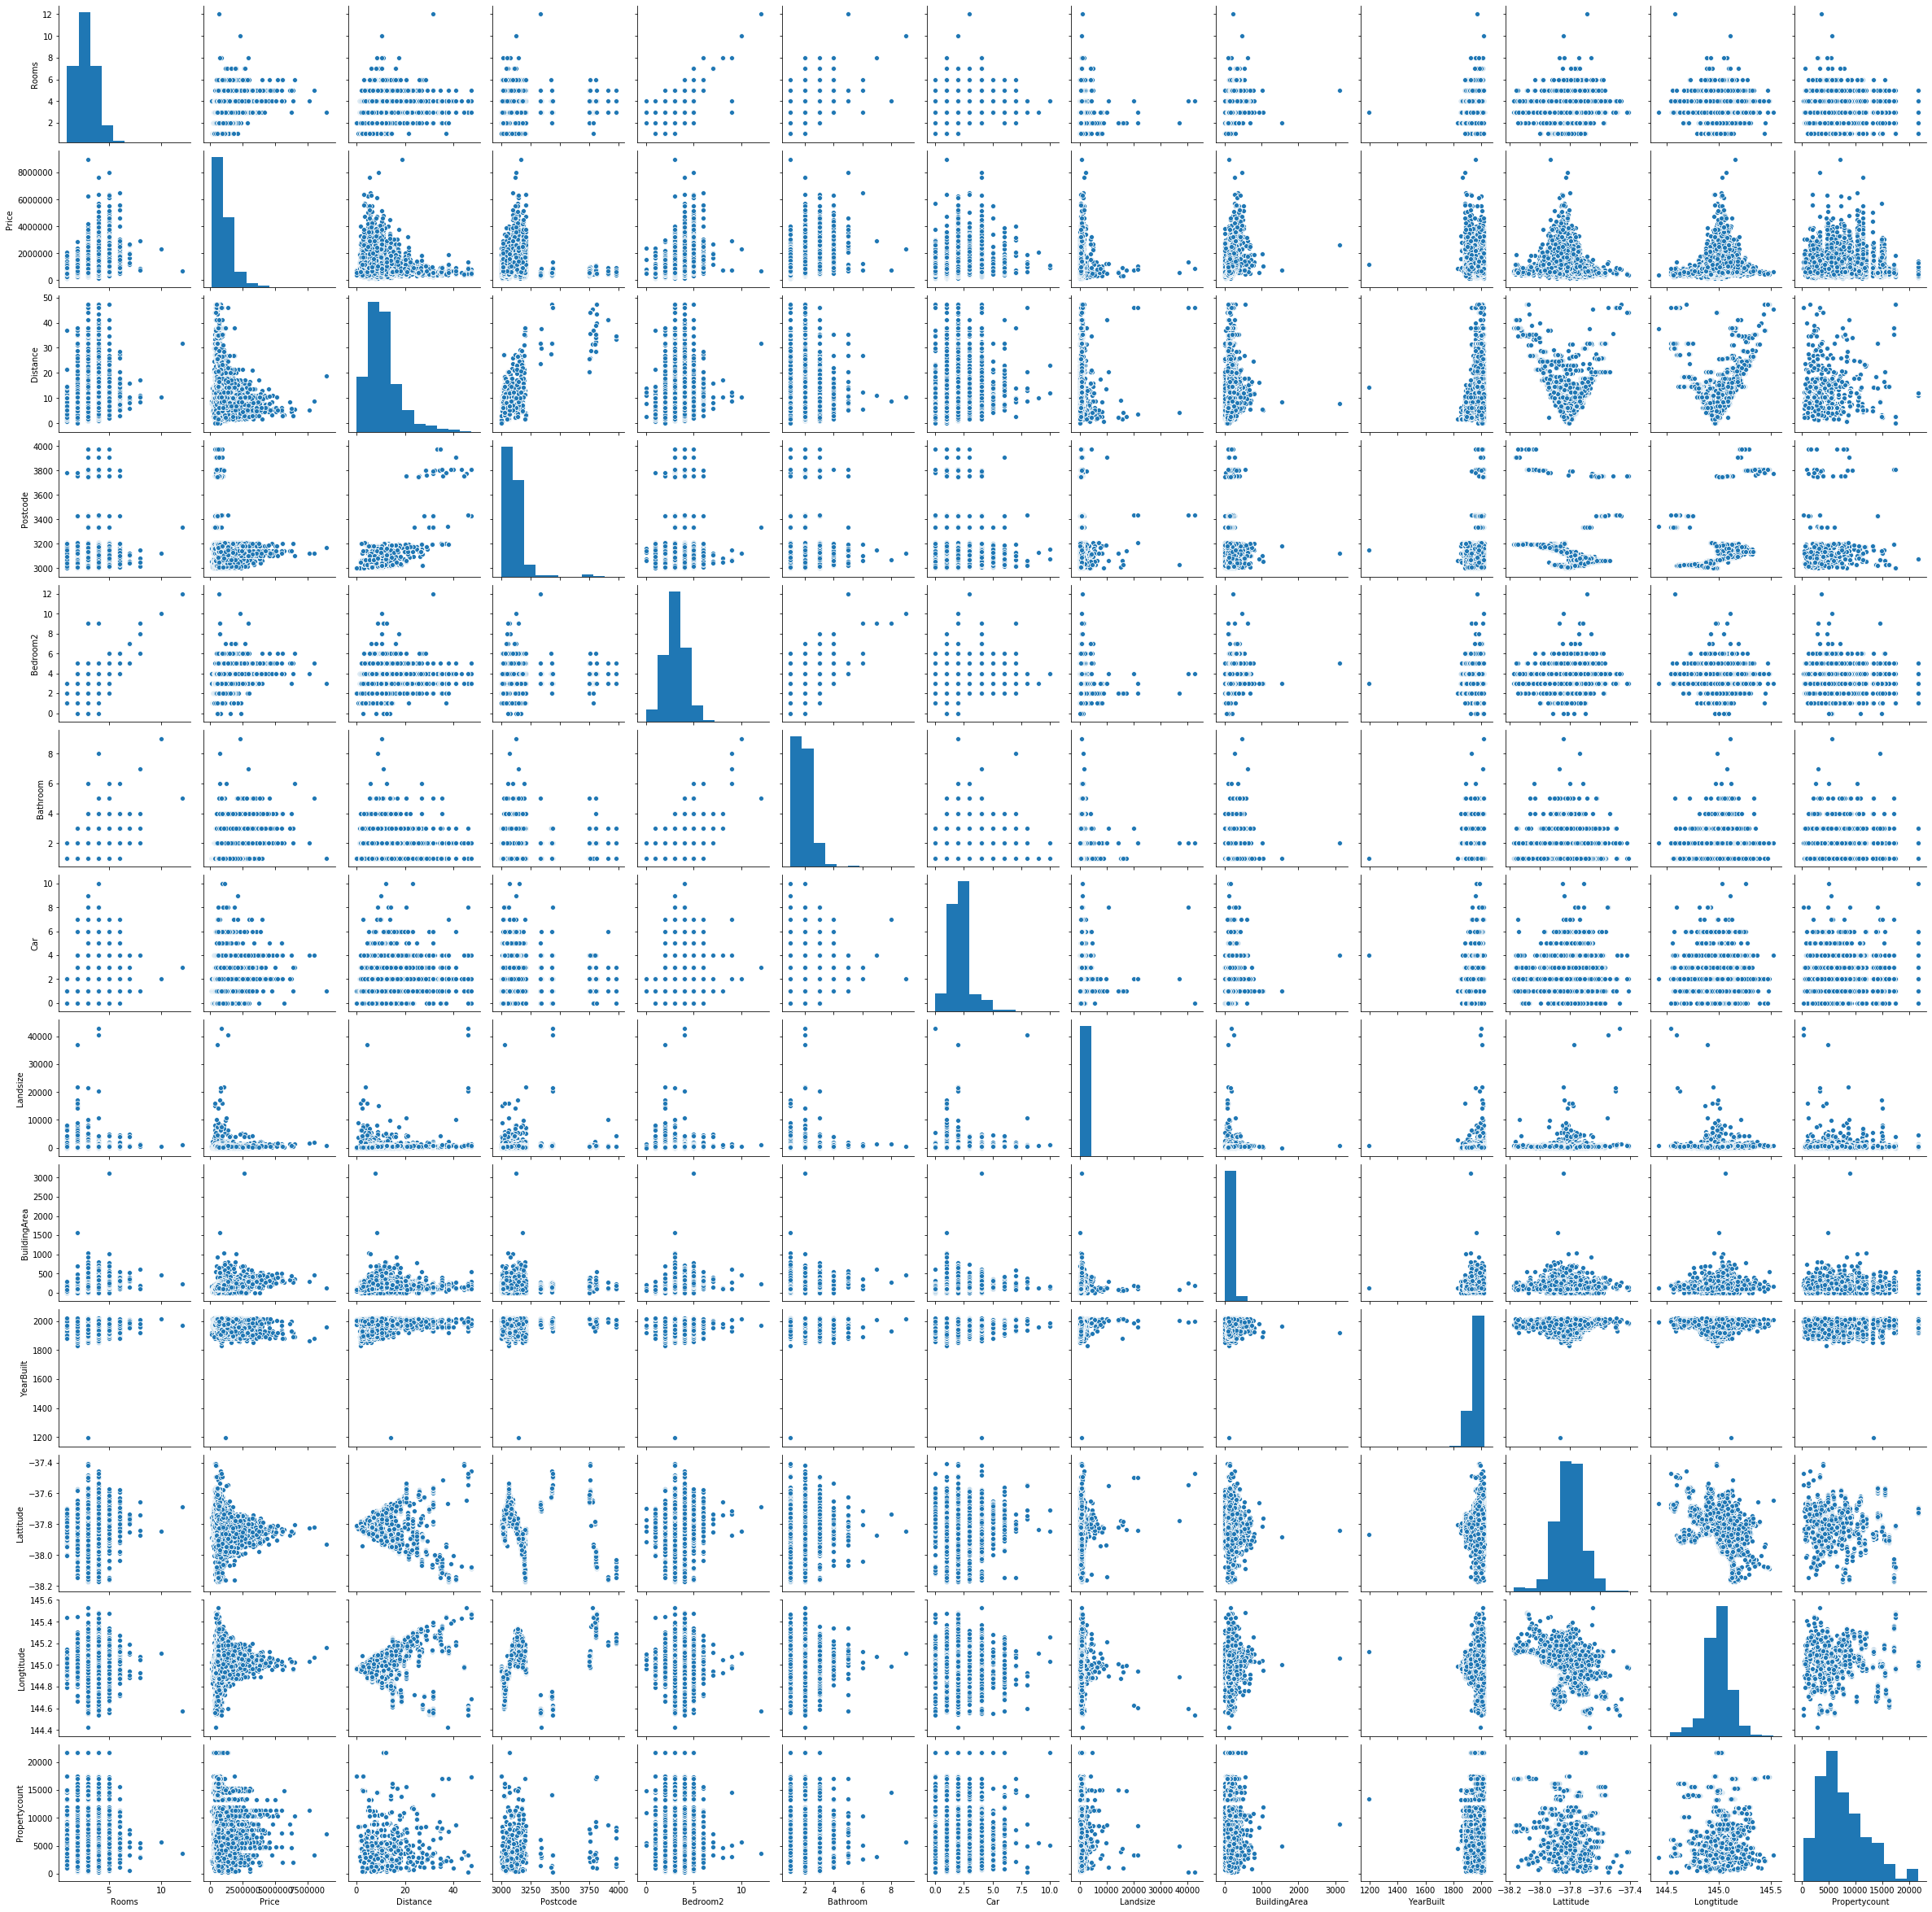

In [7]:
# Exploratory analysis: investigate different features
# to determine the relationships between the main variables (in particular related to the variabile Price).


#pairplot to see the pairwise relations (joint relationships and histrograms between univariate distributions)

sns.pairplot(house.dropna())


#Zooming this pairplot, we can see some in throughout the diagonal the distribution for each numerical variable,
#while above or below the diagonal we have the joint pairwise distributions.

#It is interesting to note that the main features are fairly right skewed as we can expected
#with the low/medium values as the predominant ones (such as houses with 3 rooms with 1 or 2 bathrooms).

#Looking to the pairwise distribution we can denote how Rooms is rather linear with the variable Bedroom2,
#perhaps the second one could be redundant.
#Another feature correlated with the number of rooms is Bathrooms and of course this seems "normal".

#The Price seems to be (positively) influenced by the number of rooms, bedrooms,
#bathrooms and the building area (this last distribution should be scaled in order to have a better view of that relationship),
#while the more is the distance (from the city centre) the less is the price of a house.




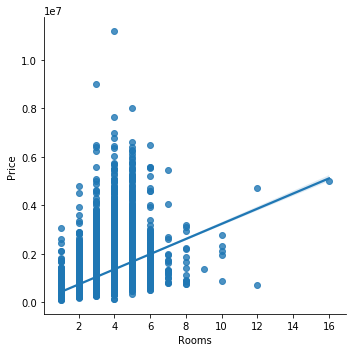

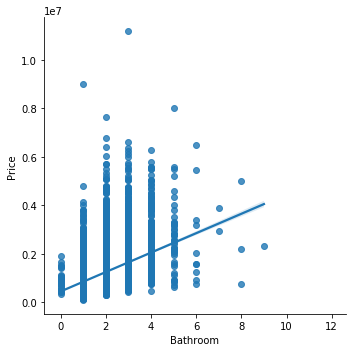

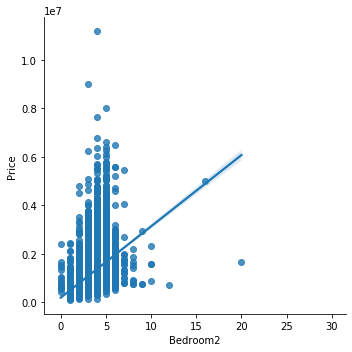

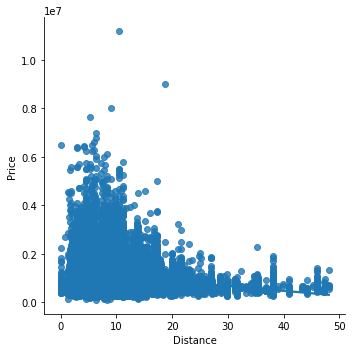

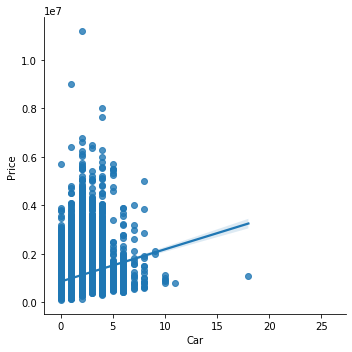

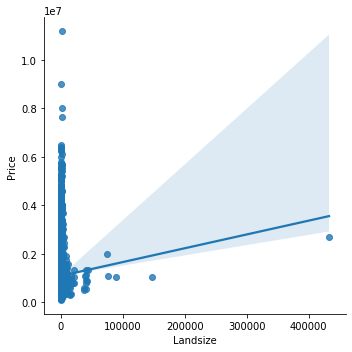

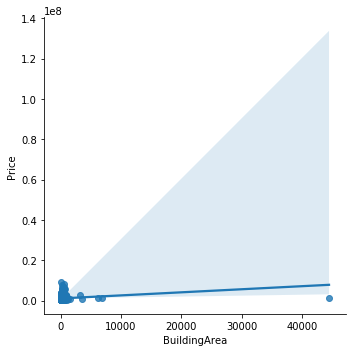

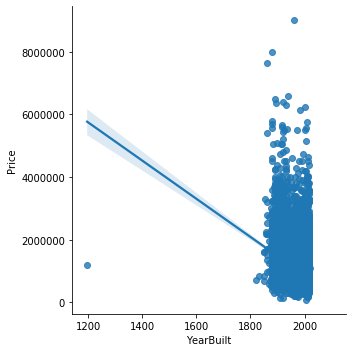

In [8]:
# analyzing the relationship between:

# rooms, bedrooms, bathrooms, building area and prize (Prize has a positeve correlation with those variables)
# in addition to this, there is a constant (limitated) ascending trend between price and building area.

# distance and price (useful to understand if the distance can affect the house price)

# car and prize (useful to understand is the car spot influence somehow the house price,
# in this case it seems that it doesn't affect the prize)


# using lmplot for linear regression plot
feat = ['Rooms','Bathroom','Bedroom2', 'Distance','Car', 'Landsize', 'BuildingArea', 'YearBuilt']
for i in feat:   
    sns.lmplot(data=house, x=i, y='Price')
    plt.show()

    
##################################################################################################################

#Additional comment:
# Rooms: the avg price of the house tends to increase as the number of rooms is equql to 6, rather then it tends to decrease
# once the room numbers is the range [7,9]. For the house where the room numbers is greater than 10 the price increses

# Bathrooms: the price increasese until 5 bathrooms.
# Then we have a fluctuation on the average price (and on the variability) when a house has 6 to 9 bathrooms.

# Outliers: They clearly appear in BuildingArea and YearBuilt

# Distance: in essence, greater is the distance less is the price. The avg price has decreasing trend

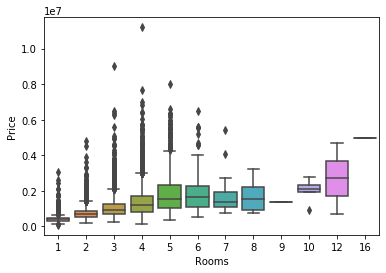

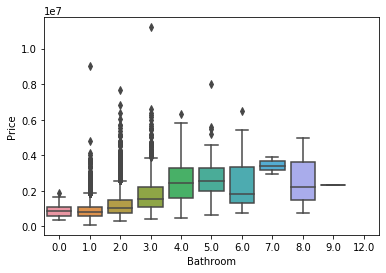

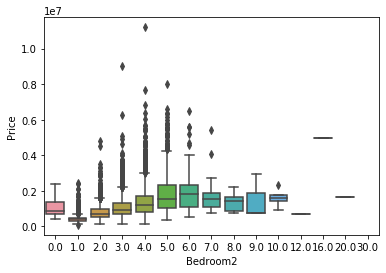

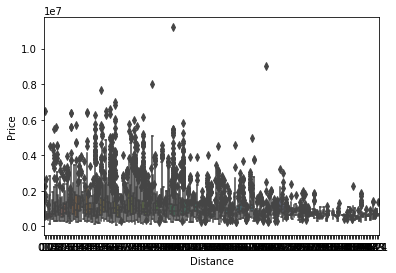

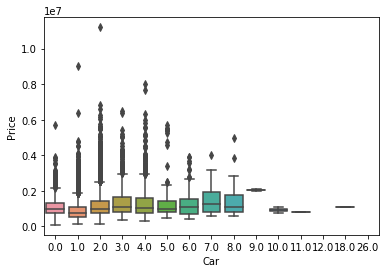

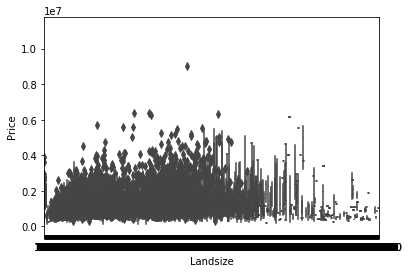

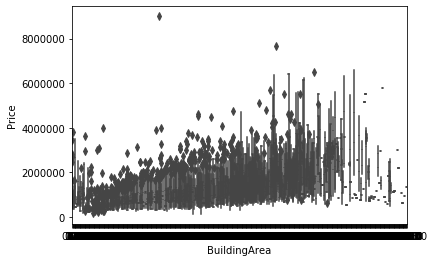

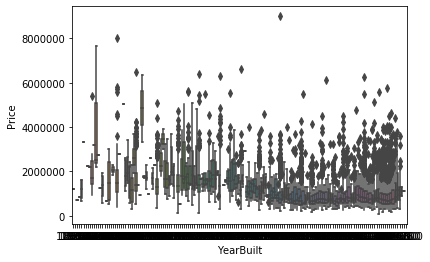

In [9]:
# Plotting the boxplots just to have a different visualization.

for i in feat:
    sns.boxplot(x=i, y='Price',data=house)
    plt.show()

In [10]:
# Note: building area and land size should be scaled in order to have a better view of that relationship

In [11]:
# re-scaling Landsize & BArea
# but first I have to remone NAs from BA e Landsize
house['BArea_clean'] = house['BuildingArea'].dropna()
house['BArea_clean'].describe()

count    13742.00000
mean       160.25640
std        401.26706
min          0.00000
25%        102.00000
50%        136.00000
75%        188.00000
max      44515.00000
Name: BArea_clean, dtype: float64

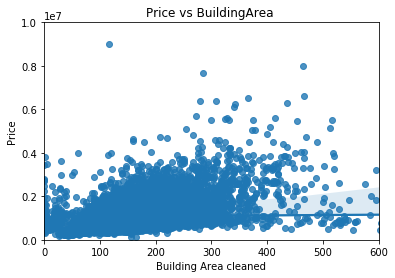

In [12]:
ax =sns.regplot(data=house, x='BArea_clean', y='Price')
plt.xlim(0,600) #limit set up to mean value + stdev
plt.ylim(0,10000000)  #the most expensive house is sold at 11.6mil
plt.xlabel('Building Area cleaned')
plt.title('Price vs BuildingArea ')
plt.show()

In [13]:
# re-scaling Landsize w/o NAs
house['Land_clean'] = house['Landsize'].dropna()
house['Land_clean'].describe()

count     23047.000000
mean        593.598993
std        3398.841946
min           0.000000
25%         224.000000
50%         521.000000
75%         670.000000
max      433014.000000
Name: Land_clean, dtype: float64

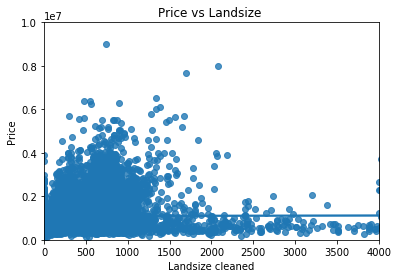

In [14]:
ax =sns.regplot(data=house, x='Land_clean', y='Price')
plt.xlim(0,4000)  #limit set up to mean value + stdev
plt.ylim(0,10000000)  #the most expensive house is sold at 11.6mil that's why we set 10mil as ymax
plt.xlabel('Landsize cleaned')
plt.title('Price vs Landsize ')
plt.show()

In [15]:
#With the zoom in, and the help of basic statistics there are two main aspects for BuildingArea and Landsize:

#distribution
#correlation with Price

#Regarding distribution, both are right skewed, but apart from outliers,
#the 75% percentile is within 188m 2  and 670m 2  respectively, so the most houses have "standard" size.

# In terms of correlation, BuildingArea has a slight positive trend with Price, especially for houses until 400 m2 .
# Although Landsize has a lower correlation with Price (almost next to nothing),
# houses with a landsize's range between 0-1500 m2 might suggest a small increasing trend.

In [16]:
## Analysis of categorical variables

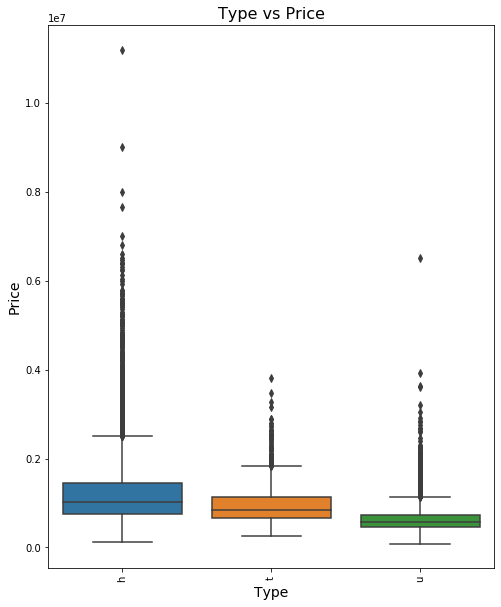

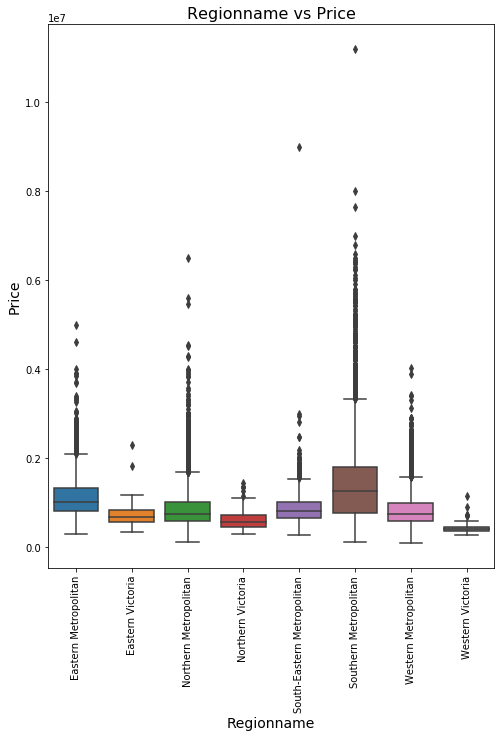

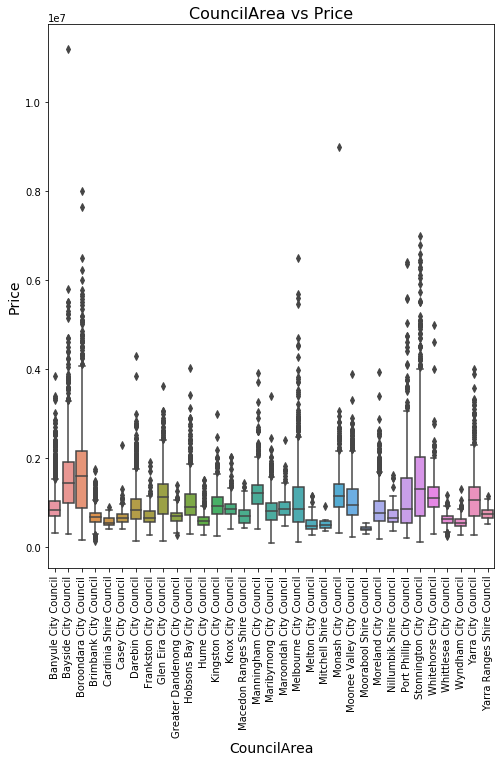

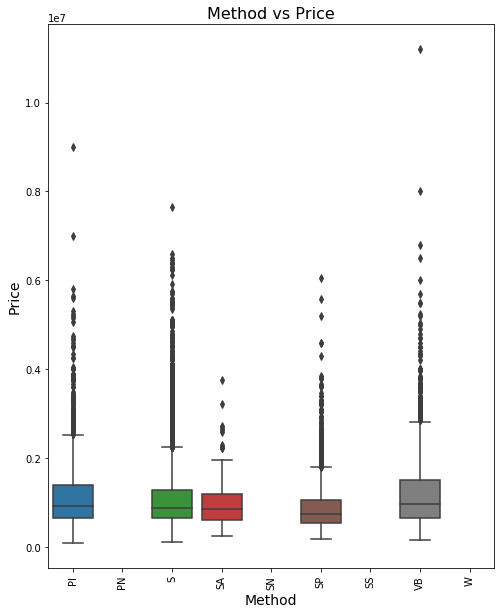

In [17]:
# plotting categorical features with Price

cat_feat = ['Type','Regionname','CouncilArea','Method']

for i in cat_feat:
    f, ax = plt.subplots(1,1, figsize = (8,10))
    sns.boxplot(x=i, y='Price',data=house)
    plt.xticks(rotation=90)
    plt.title('%s vs Price' %i, fontsize = 16)
    plt.xlabel(i, fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    plt.show()

In [18]:
# count, unique values, mode value and frequency of categorical features
print(house[cat_feat].describe()) 

         Type             Regionname              CouncilArea Method
count   34857                  34854                    34854  34857
unique      3                      8                       33      9
top         h  Southern Metropolitan  Boroondara City Council      S
freq    23980                  11836                     3675  19744


In [19]:
for i in cat_feat:
  house['Price'].groupby(house[i]).describe()


In [20]:
house['Price'].groupby(house['Type']).describe()

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
h,18472.0,1.203718e+06,687939.504804,131000.0,746000.0,1015000.0,1450000.0,11200000.0
t,2866.0,9.310772e+05,382868.562260,256000.0,670000.0,850000.0,1135000.0,3820000.0
u,5909.0,6.279434e+05,296680.108707,85000.0,450000.0,580000.0,725000.0,6500000.0


In [21]:
house['Price'].groupby(house['Regionname']).describe()

,count,mean,std,min,25%,50%,75%,max
Regionname,,,,,,,,
Eastern Metropolitan,3272.0,1.108723e+06,452246.950081,288000.0,800000.0,1015000.0,1320000.0,5000000.0
Eastern Victoria,166.0,7.143282e+05,227462.047997,337000.0,570250.0,679000.0,822500.0,2300000.0
Northern Metropolitan,7864.0,8.614840e+05,437278.963543,121000.0,582000.0,752500.0,1020000.0,6500000.0
Northern Victoria,166.0,6.190512e+05,225510.959416,296000.0,447000.0,565000.0,719375.0,1430000.0
South-Eastern Metropolitan,1341.0,8.776827e+05,390512.554640,266000.0,650000.0,811250.0,1010000.0,9000000.0
Southern Metropolitan,8524.0,1.395928e+06,857360.814587,112000.0,765000.0,1250000.0,1790000.0,11200000.0
Western Metropolitan,5815.0,8.376153e+05,382695.929342,85000.0,585000.0,750000.0,982750.0,4020000.0
Western Victoria,96.0,4.326068e+05,126730.286253,280000.0,370000.0,412125.0,457000.0,1152000.0


In [22]:
house['Price'].groupby(house['CouncilArea']).describe()

,count,mean,std,min,25%,50%,75%,max
CouncilArea,,,,,,,,
Banyule City Council,1457.0,9.363689e+05,4.144511e+05,325000.0,700000.0,830000.0,1035000.0,3850000.0
Bayside City Council,1311.0,1.574122e+06,8.299045e+05,290000.0,983750.0,1435000.0,1902500.0,11200000.0
Boroondara City Council,2520.0,1.667326e+06,9.383858e+05,160000.0,873750.0,1600000.0,2160000.0,8000000.0
Brimbank City Council,1366.0,6.821819e+05,1.791452e+05,145000.0,572500.0,665000.0,765000.0,1750000.0
Cardinia Shire Council,26.0,5.729231e+05,1.248287e+05,410500.0,490750.0,531250.0,652125.0,910000.0
Casey City Council,138.0,6.832374e+05,2.167601e+05,396000.0,565875.0,645000.0,737500.0,2300000.0
Darebin City Council,2349.0,9.023185e+05,4.061138e+05,145000.0,631000.0,830000.0,1085000.0,4300000.0
Frankston City Council,229.0,6.979241e+05,2.345877e+05,266000.0,560000.0,645000.0,800000.0,1905000.0
Glen Eira City Council,1643.0,1.116693e+06,4.899906e+05,131000.0,745750.0,1130000.0,1415500.0,3630000.0


In [23]:
house['Price'].groupby(house['Method']).describe()

,count,mean,std,min,25%,50%,75%,max
Method,,,,,,,,
PI,3255.0,1.117884e+06,711985.854152,85000.0,650000.0,920000.0,1400000.0,9000000.0
PN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S,17515.0,1.051460e+06,614850.755353,112000.0,650000.0,881000.0,1290000.0,7650000.0
SA,190.0,9.825047e+05,544797.578274,240000.0,611250.0,850000.0,1197500.0,3750000.0
SN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SP,3603.0,8.790224e+05,500628.334965,190000.0,550000.0,751000.0,1050000.0,6050000.0
SS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VB,2684.0,1.194205e+06,820155.487355,160000.0,650000.0,970000.0,1520000.0,11200000.0
W,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#From the boxplots and the following summary statistics tables, it can be summarized:

#The modal value for the type of house is "h"(house, cottages or villas) with a median price over for houses are over 1mil.
#Then, there are townhomes ("t" type) with a median price around 800k-900k even if townhouse are those kind of houses with
#the smallest proportion of the dataset. Unit or duplex houses ("u") are the less expensive with a median price approximately at 500k.

#The Metropolitan Region has higher house prices compared to the Victoria Region,
#with the Southern Metropolitan being the area with the highest median home price.
#This region has also the biggest density of houses and city of Melbourne is included in this area.

#The outcome for the Council area is a stricted result of the previous one: council areas with
#highest median price are in the Metropolitan Region.

#Home prices with different selling methods are relatively the same across the board.
#The Vendor Bid method seems to have a little more variability and outliers
#compared to the others as well as a higher mean and median value.

In [25]:
#################################################################################################################
#################################################################################################################
#################################################################################################################
#################################################################################################################

# Exploring correlation between features

# there are 2 features that could be very similar (Rooms and Bedroom2). Moreover the description of the second variable is not very clear
# ("Scraped # of Bedrooms (from different source)") and should have some typing/import errors.
del house['BArea_clean']

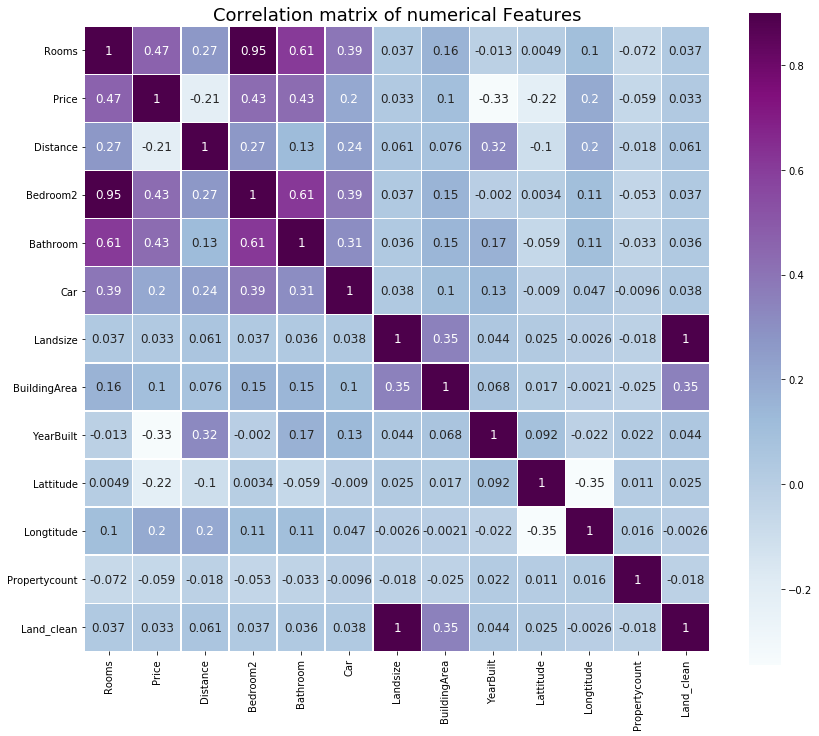

In [26]:
cor_mat = house.corr()
f, ax = plt.subplots(figsize=(14, 12))
plt.title('Correlation matrix of numerical Features', size =18)
sns.heatmap(cor_mat, vmax=.9, square=True, linewidths=.4 ,annot=True,cmap ='BuPu', annot_kws={'size':12});

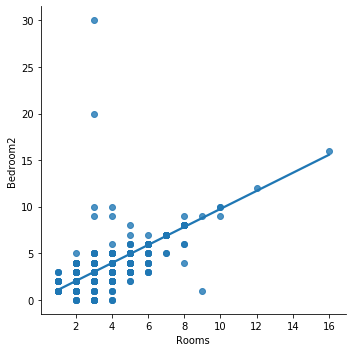

In [27]:

#From the above correlation matrix it can be seen the pairwise correlation between all the numeric features.

#Price seems to be correlated with Rooms, Bathroom, Bedroom2 and Distance and YearBuilt (a negative correlation with the last two).

#Focusing only to Rooms and Bedroom2 we can spot a very high correlation (0.95) that could suggest a possible redundancy.

# Plotting "Rooms" with "Bedroom2"
sns.lmplot(data= house, x='Rooms', y='Bedroom2')

# The relation between these 2 variables is almost linear. It can be noticed that there are some outliers
# (Bedroom2 with 20 and 30, corrisponding with Rooms values both at 3. While 1 Bedroom2 is set with 9 Rooms).

In [28]:
# looking at those obs with higher values (possible outliers) of Room and Bedroom2
Data_view = house[(house["Bedroom2"] >= 20) | (house["Rooms"] == 9)]
Data_view

# Here we have the evidence that probably there were some typing errors
# (for instance 30 Bedroom2 should have been 3 with 1 bathroom insted of 12,
# while 20 Bedrooms2 should have been only 2, that summed up with 1 bathroom leads to a 3 total rooms of that specific house).

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Land_clean
1932,Brighton,2a Dendy St,9,t,NaN,S,Rodney,2016-05-28,11.2,3186.0,NaN,NaN,NaN,NaN,NaN,NaN,Bayside City Council,-37.91920,144.98900,Southern Metropolitan,10579.0,NaN
2536,Burwood,36 Cumming St,3,h,NaN,PI,Ross,2016-08-10,11.7,3125.0,30.0,12.0,0.0,946.0,NaN,1950.0,Monash City Council,-37.85300,145.11290,Southern Metropolitan,5678.0,946.0
7535,Oakleigh South,17 Windsor Av,9,h,1380000.0,S,Ray,2016-10-09,14.7,3167.0,NaN,NaN,NaN,NaN,NaN,NaN,Kingston City Council,NaN,NaN,South-Eastern Metropolitan,3692.0,NaN
12043,Caulfield East,5 Grange Rd,3,h,1650000.0,PI,Woodards,2016-06-08,9.3,3145.0,20.0,1.0,2.0,875.0,NaN,NaN,Glen Eira City Council,-37.88150,145.04910,Southern Metropolitan,608.0,875.0
21569,Templestowe,12 Read St,9,h,NaN,VB,Fletchers,2017-09-16,15.5,3106.0,9.0,4.0,5.0,NaN,NaN,NaN,Manningham City Council,-37.75198,145.14544,Eastern Metropolitan,6202.0,NaN
22888,Windsor,56 The Avenue,9,h,NaN,SP,Marshall,2017-09-23,4.6,3181.0,1.0,1.0,NaN,1021.0,NaN,NaN,Port Phillip City Council,-37.85344,144.99853,Southern Metropolitan,4380.0,1021.0


In [29]:
#Finally, "Bedroom2" can be dropped
house = house.drop(['Bedroom2'], axis=1)

In [30]:
# Numeric features exploration
# visualising some basic statistics in order to explore the main features more closely
pd.set_option('display.max_columns', None)
house.describe()


# Comments:

# 12 bathrooms as a max value (probably a typing error)
# but also there are some houses with no bathroom

# 26 car spots seems quite a lot. Investigate, maybe could be another typing error - comparing with Landsize and BuildingArea.

# Extreme values of Landsize and BuildingArea seem too excessive

# Year max is 2106, clearly an error. Investigate if there are "Year" greater than 2018 and try to replace with a more proper value.


,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Land_clean
count,34857.000000,2.724700e+04,34856.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000,23047.000000
mean,3.031012,1.050173e+06,11.184929,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306,593.598993
std,0.969933,6.414671e+05,6.788892,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313,3398.841946
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000,0.000000
25%,2.000000,6.350000e+05,6.400000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000,224.000000
50%,3.000000,8.700000e+05,10.300000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000,521.000000
75%,4.000000,1.295000e+06,14.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000,670.000000
max,16.000000,1.120000e+07,48.100000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000,433014.000000


In [31]:
# create  auxiliary columnS from Bathroom and Car, in order to keep these new variables as float
#(because after the following loop "Bathroom" and "Car" will become object var due to the insert of "Missing" as a string)
house['Bath_clean'] = house['Bathroom'].dropna()
house['Car_clean'] = house['Car'].dropna()

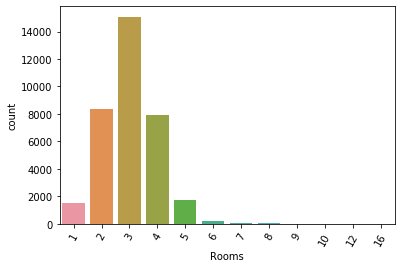

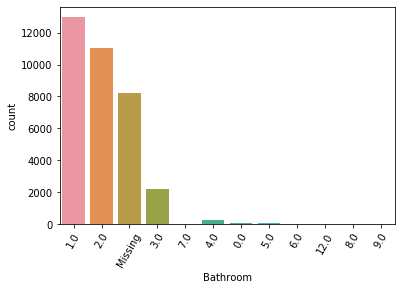

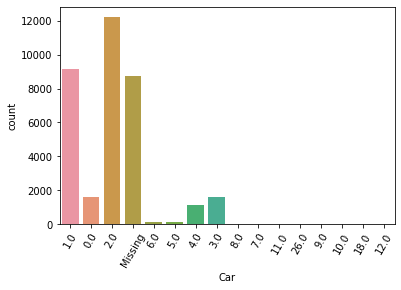

In [32]:


num_feat = ['Rooms', 'Bathroom', 'Car']
for i in num_feat:
    house[i] = house[i].fillna('Missing')
    sns.countplot(data=house, x=i)
    plt.xticks(rotation=60)
    plt.show()

In [33]:
# with the previous loop, filling the missing with "Missing",
# Bath and Car will be converted from int/float into "object" (Room does not have any misssing so it remains "int")
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  category      
 1   Address        34857 non-null  category      
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  category      
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  category      
 6   SellerG        34857 non-null  category      
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  category      
 10  Bathroom       34857 non-null  object        
 11  Car            34857 non-null  object        
 12  Landsize       23047 non-null  float64       
 13  BuildingArea   13742 non-null  float64       
 14  YearBuilt      15551 non-null  float64       
 15  CouncilArea    3485

In [34]:
house["Bathroom"].value_counts()

1.0        12969
2.0        11064
Missing     8226
3.0         2181
4.0          269
5.0           77
0.0           46
6.0           16
7.0            4
8.0            3
12.0           1
9.0            1
Name: Bathroom, dtype: int64

In [35]:
house[(house["Bathroom"] == 0) & (house["Landsize"] <= 50)]
# Thee number of apartaments with no bath & no landsize (& NaN on BArea..) is 24 (out of 46) 

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Land_clean,Bath_clean,Car_clean
481,Armadale,3/50 Denbigh Rd,2,u,546000.0,SP,hockingstuart,2016-07-30,6.3,3143.0,0,0,0.0,NaN,NaN,Stonnington City Council,-37.85680,145.01610,Southern Metropolitan,4836.0,0.0,0.0,0.0
845,Balaclava,5/11 Albion St,2,u,497500.0,PI,hockingstuart,2016-08-28,6.6,3183.0,0,0,0.0,NaN,NaN,Port Phillip City Council,-37.87390,144.99290,Southern Metropolitan,2952.0,0.0,0.0,0.0
1772,Brighton,17 New St,3,h,1900000.0,S,Marshall,2016-06-08,11.2,3186.0,0,0,0.0,NaN,NaN,Bayside City Council,-37.93010,144.99350,Southern Metropolitan,10579.0,0.0,0.0,0.0
1784,Brighton,1/5 Webb St,3,t,1067000.0,S,Kay,2016-07-05,11.2,3186.0,0,1,0.0,NaN,NaN,Bayside City Council,-37.91190,144.98710,Southern Metropolitan,10579.0,0.0,0.0,1.0
3717,Eaglemont,3/43 Waldemar Rd,3,t,NaN,SN,Miles,2016-08-10,10.3,3084.0,0,0,0.0,NaN,NaN,Banyule City Council,-37.75940,145.05420,Eastern Metropolitan,1651.0,0.0,0.0,0.0
3812,Elsternwick,5/29 Nepean Hwy,2,u,410000.0,VB,Gary,2016-05-28,8.5,3185.0,0,0,0.0,NaN,NaN,Glen Eira City Council,-37.88630,144.99960,Southern Metropolitan,4898.0,0.0,0.0,0.0
4434,Footscray,2 Greenham Pl,2,t,NaN,SA,Reach,2016-07-16,6.4,3011.0,0,0,0.0,NaN,NaN,Maribyrnong City Council,-37.79930,144.89660,Western Metropolitan,7570.0,0.0,0.0,0.0
4637,Glen Iris,1/64 Edgar St N,2,u,545000.0,S,Fletchers,2016-07-16,9.2,3146.0,0,0,0.0,NaN,NaN,Boroondara City Council,-37.85000,145.04650,Southern Metropolitan,10412.0,0.0,0.0,0.0
5590,Ivanhoe,5/125 Locksley Rd,2,u,460000.0,VB,Fletchers,2016-04-16,7.9,3079.0,0,0,0.0,NaN,NaN,Banyule City Council,-37.76620,145.05160,Eastern Metropolitan,5549.0,0.0,0.0,0.0
5827,Kensington,7/51 Epsom Rd,2,u,526000.0,S,Nelson,2016-08-22,4.2,3031.0,0,0,0.0,NaN,NaN,Melbourne City Council,-37.79190,144.92530,Northern Metropolitan,5263.0,0.0,0.0,0.0


In [36]:

# There are 9 houses with 7+ bathrooms, while at the same time there are 46 houses without a single bathroom. Let's try to have a deeper look:

# Looking at the subset of "non-bathroom houses", it can be noticed the absence of landsize and building area too.
# One possibility could be that these houses are vey old houses with a common bathoom outside the house.
# But the fact is that also YearBuilt is missing in this subset, so this hypothesis is not 100 % trustable.

# Among these 24 observations, there are 6 that does not have a value for Price, those ones will be deleted.


In [37]:
# Data frame back up
house_old = house.copy() #create a copy of the previous df
house;

In [38]:
# dropping 6 rows
house.drop(house[(house["Bathroom"] == 0) & (house["Landsize"] <= 50) & (pd.isna(house['Price']))].index, inplace=True)
house = house.reset_index(); #reset index in order to avoid missing "rows"
house.info(); #check: it should be 34851 entries (from 34857)
house.drop(columns=['index'], inplace=True, axis=1); #drop the index column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34851 entries, 0 to 34850
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          34851 non-null  int64         
 1   Suburb         34851 non-null  category      
 2   Address        34851 non-null  category      
 3   Rooms          34851 non-null  int64         
 4   Type           34851 non-null  category      
 5   Price          27247 non-null  float64       
 6   Method         34851 non-null  category      
 7   SellerG        34851 non-null  category      
 8   Date           34851 non-null  datetime64[ns]
 9   Distance       34850 non-null  float64       
 10  Postcode       34850 non-null  category      
 11  Bathroom       34851 non-null  object        
 12  Car            34851 non-null  object        
 13  Landsize       23041 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

In [39]:
house['Bath_clean'].describe()

count    26625.000000
mean         1.625164
std          0.723883
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         12.000000
Name: Bath_clean, dtype: float64

In [40]:
# Analysing the house where the bathroom number is greater than 6 and the rooms number is less than 7
house[(house["Bath_clean"] > 6) & (house["Rooms"] < 7)]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Land_clean,Bath_clean,Car_clean
1004,Balwyn,29 Sevenoaks St,5,h,3900000.0,PI,Jellis,2016-08-28,9.7,3103.0,7,6,0.0,NaN,NaN,Boroondara City Council,-37.80490,145.07480,Southern Metropolitan,5682.0,0.0,7.0,6.0
2536,Burwood,36 Cumming St,3,h,NaN,PI,Ross,2016-08-10,11.7,3125.0,12,0,946.0,NaN,1950.0,Monash City Council,-37.85300,145.11290,Southern Metropolitan,5678.0,946.0,12.0,0.0
8247,Preston,421 Murray Rd,4,h,760000.0,PI,Barry,2016-05-22,8.8,3072.0,8,7,1254.0,280.0,1928.0,Darebin City Council,-37.73670,144.98950,Northern Metropolitan,14577.0,1254.0,8.0,7.0
30123,Brighton East,11 Summerhill Rd,5,h,NaN,VB,Marshall,2017-09-12,10.3,3187.0,7,2,650.0,117.0,1930.0,Bayside City Council,-37.91794,145.01271,Southern Metropolitan,6938.0,650.0,7.0,2.0


In [41]:
#  Attention points:
# 4(out of 9) houses with more bathrooms than rooms
# 3 out of 4 are old houses (built in 1950 or before), having a huge value of landsize. Those houses will be kept

In [42]:
#drop Bath_clean columns
house.drop(columns=['Bath_clean'], inplace=True, axis=1)

In [43]:
house["Car"].value_counts()

2.0        12214
1.0         9164
Missing     8728
0.0         1625
3.0         1606
4.0         1161
5.0          151
6.0          140
7.0           25
8.0           23
10.0           6
9.0            3
11.0           2
26.0           1
18.0           1
12.0           1
Name: Car, dtype: int64

In [44]:
# Printing out the houses where Car is in [9,10, 11,12,18,26]

for i in (9,10, 11,12,18,26): #value range for the values of car >8
    print(house[(house["Car"] == i)] )

# Looking at these 14 "observations" with high values of Car, it can be easily noticed that they are quite correlated with
# high values of Landsize too. All but one are greater than the mean value of Landsize and bigger than the 3rd quartile.

# The highest car value = 26 (index = 6015) is also the one with the smallest Landsize value in this subset.
#It also show a missing value in Price (together with other four observation). This observation will be dropped


                 Suburb             Address  Rooms Type      Price Method  \
14645      Surrey Hills  1093 Riversdale Rd      3    h  2100000.0     VB   
30984  Hoppers Crossing       21 Madison Dr      4    h        NaN     PI   
33151        Camberwell      1299 Toorak Rd      4    h  2000000.0     PI   

      SellerG       Date  Distance Postcode Bathroom Car  Landsize  \
14645  Jellis 2017-01-07      10.2   3127.0        1   9     841.0   
30984    Gold 2018-03-02      18.4   3029.0        2   9       NaN   
33151      RT 2018-03-17       7.7   3124.0        3   9     601.0   

       BuildingArea  YearBuilt              CouncilArea  Lattitude  \
14645         124.0     1960.0  Boroondara City Council  -37.83729   
30984         180.0     1974.0     Wyndham City Council  -37.88496   
33151           NaN        NaN  Boroondara City Council  -37.84938   

       Longtitude             Regionname  Propertycount  Land_clean  Car_clean  
14645   145.10929  Southern Metropolitan        

In [45]:
# Analyzing the Landsize variable

house["Landsize"].describe()

count     23041.000000
mean        593.753570
std        3399.270975
min           0.000000
25%         224.000000
50%         521.000000
75%         670.000000
max      433014.000000
Name: Landsize, dtype: float64

In [46]:
house.drop(house[(house["Car_clean"] > 8)  & (pd.isna(house['Price']))].index, inplace=True)
house = house.reset_index(); #reset index in order to avoid missing "rows"
house.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34846 entries, 0 to 34845
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          34846 non-null  int64         
 1   Suburb         34846 non-null  category      
 2   Address        34846 non-null  category      
 3   Rooms          34846 non-null  int64         
 4   Type           34846 non-null  category      
 5   Price          27247 non-null  float64       
 6   Method         34846 non-null  category      
 7   SellerG        34846 non-null  category      
 8   Date           34846 non-null  datetime64[ns]
 9   Distance       34845 non-null  float64       
 10  Postcode       34845 non-null  category      
 11  Bathroom       34846 non-null  object        
 12  Car            34846 non-null  object        
 13  Landsize       23037 non-null  float64       
 14  BuildingArea   13738 non-null  float64       
 15  YearBuilt      1554

In [47]:
# Drop "Car_clean"column.
house.drop(columns=["Car_clean"], inplace=True, axis=1)
house.head();
house.drop(columns=['index'], inplace=True, axis=1);

In [48]:
# Moving on BuildingArea and Landsize observation (extreme values).

# Infer about min/max values of BuildingArea and Landsize
house['Landsize'].describe()
house[house['Landsize']>17600] #values > than mean+5*stdev

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Land_clean
1198,Balwyn North,9 Gildan St,3,h,2000000.0,VB,Kay,2016-08-28,9.2,3104.0,1,2,75100.0,NaN,NaN,Boroondara City Council,-37.80020,145.07000,Southern Metropolitan,7809.0,75100.0
6586,Maribyrnong,44/2 Horizon Dr,2,u,495000.0,S,Brad,2017-03-18,8.7,3032.0,2,2,37000.0,NaN,NaN,Maribyrnong City Council,-37.77520,144.89250,Western Metropolitan,4918.0,37000.0
7780,Port Melbourne,36/3 Seisman Pl,2,u,1340000.0,VB,Chisholm,2016-03-12,3.8,3207.0,2,2,21700.0,NaN,2000.0,Melbourne City Council,-37.84240,144.94490,Southern Metropolitan,8648.0,21700.0
8593,Reservoir,14 Beenak St,3,h,572000.0,S,Ray,2016-04-23,11.2,3073.0,1,2,41400.0,NaN,NaN,Darebin City Council,-37.71040,145.02570,Northern Metropolitan,21650.0,41400.0
13454,Port Melbourne,55/4 Seisman Pl,2,u,1030000.0,S,Buxton,2017-04-29,3.8,3207.0,2,2,21715.0,99.0,2005.0,Melbourne City Council,-37.84240,144.94490,Southern Metropolitan,8648.0,21715.0
15101,Maribyrnong,2/6 Horizon Dr,2,u,585000.0,S,Brad,2017-03-06,4.3,3032.0,2,2,37000.0,90.0,2004.0,Maribyrnong City Council,-37.77518,144.89254,Western Metropolitan,4918.0,37000.0
16531,Silvan,1 Parker Rd,4,h,1070000.0,S,Ray,2017-06-24,34.6,3795.0,2,3,38490.0,NaN,NaN,Yarra Ranges Shire Council,-37.83229,145.43003,Eastern Victoria,457.0,38490.0
17285,Silvan,16 Eleanor Dr,3,h,1085000.0,S,Harcourts,2017-05-27,34.6,3795.0,2,2,76000.0,NaN,NaN,Yarra Ranges Shire Council,-37.84739,145.47052,Eastern Victoria,457.0,76000.0
18028,Fitzroy,389 Gore St,3,h,2700000.0,VB,Kay,2017-12-08,2.1,3065.0,3,1,433014.0,NaN,NaN,Yarra City Council,-37.79751,144.98309,Northern Metropolitan,5825.0,433014.0
18523,Gisborne,21 Braeside Rd,4,h,807000.0,S,Raine,2017-07-15,45.9,3437.0,2,3,40468.0,NaN,NaN,Macedon Ranges Shire Council,-37.50929,144.56444,Northern Victoria,3376.0,40468.0


In [49]:
# In this subset most houses have a missing value of BuildingArea, while 3 have a missing value in Price.
#If we combined those ones with 'NAs' both on Price and Building Area we obtained two observations
#(index 29982 and 32556) they can be deleted.


# Moreover, the observation 22624 has a BuildingArea greater than its Landsize.
# It will be fixed later; while a striking outlier in Landsize is detected on the observation 18028 with more than 43k square meters.

In [50]:
house.drop(house[(house['Landsize']>17600) & (pd.isna(house['BuildingArea'])) & (pd.isna(house['Price']))].index, inplace=True)
house = house.reset_index(); #reset index in order to avoid missing "rows"
house.drop(columns=['index'], inplace=True, axis=1)
house.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34844 entries, 0 to 34843
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34844 non-null  category      
 1   Address        34844 non-null  category      
 2   Rooms          34844 non-null  int64         
 3   Type           34844 non-null  category      
 4   Price          27247 non-null  float64       
 5   Method         34844 non-null  category      
 6   SellerG        34844 non-null  category      
 7   Date           34844 non-null  datetime64[ns]
 8   Distance       34843 non-null  float64       
 9   Postcode       34843 non-null  category      
 10  Bathroom       34844 non-null  object        
 11  Car            34844 non-null  object        
 12  Landsize       23035 non-null  float64       
 13  BuildingArea   13738 non-null  float64       
 14  YearBuilt      15548 non-null  float64       
 15  CouncilArea    3484

In [51]:
# Check on min values
house[house['Landsize']<50]; #we have more than 2000 obs, but the most have '0' as value of Landsize. 
house[(house['Landsize']<50) & (house['Landsize']>0) &(house["BuildingArea"] > 50)]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Land_clean
3417,Coburg,14 Rose St,4,h,1150000.0,PI,Peter,2016-07-26,7.8,3058.0,2,2,43.0,205.0,1930.0,Darebin City Council,-37.74560,144.94690,Northern Metropolitan,11204.0,43.0
14172,Toorak,32/637 Orrong Rd,3,t,1320000.0,S,Gary,2017-04-29,4.6,3142.0,2,1,3.0,131.0,1970.0,Stonnington City Council,-37.84740,145.01250,Southern Metropolitan,7217.0,3.0
16922,Footscray,6/6 Rosamond Rd,2,t,455000.0,S,Biggin,2017-05-27,5.1,3011.0,1,1,43.0,86.0,2010.0,Maribyrnong City Council,-37.78822,144.88361,Western Metropolitan,7570.0,43.0
17428,Bentleigh,4/463 South Rd,2,u,380000.0,PI,Hodges,2017-08-07,11.4,3204.0,1,1,1.0,62.0,2011.0,Glen Eira City Council,-37.93320,145.03794,Southern Metropolitan,6795.0,1.0
17552,Glen Waverley,53 Botanic Dr,3,h,NaN,SN,JY,2017-08-07,16.7,3150.0,1,2,1.0,102.0,1960.0,Monash City Council,-37.89464,145.16600,Eastern Metropolitan,15321.0,1.0
17809,West Melbourne,125/33 Jeffcott St,2,u,670000.0,S,MICM,2017-08-07,3.1,3003.0,1,1,17.0,90.0,1996.0,Melbourne City Council,-37.81180,144.95259,Northern Metropolitan,2230.0,17.0
18460,Craigieburn,28/60 Cradle Mountain Dr,2,t,310000.0,PI,Ray,2017-07-15,20.6,3064.0,1,1,38.0,114.0,2013.0,Hume City Council,-37.57467,144.92229,Northern Metropolitan,15510.0,38.0
22692,Prahran,7 MacKay St,3,t,1463000.0,S,Jellis,2017-09-23,4.6,3181.0,2,2,15.0,147.0,1998.0,Stonnington City Council,-37.84969,145.00057,Southern Metropolitan,7717.0,15.0


In [52]:
# Houses with zero on Landsize:

# These houses probably are the so-called "zero-lot-line" houses.
# In other words residential real estate in which the structure comes up to or very near the edge of the property line,
# so they will be kept in the dataset

In [53]:
# Check on "unexpected" values: Landsize less than BArea
house[(house['Landsize']< house['BuildingArea']) & (house['Landsize']>0) ]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Land_clean
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,2,0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,134.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,1,2,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0,120.0
39,Abbotsford,1/1 Mayfield St,3,h,NaN,SP,Nelson,2017-03-18,2.5,3067.0,2,1,119.0,167.0,2005.0,Yarra City Council,-37.80820,144.99990,Northern Metropolitan,4019.0,119.0
43,Abbotsford,52a William St,2,h,1100000.0,PI,Biggin,2016-06-18,2.5,3067.0,2,1,124.0,135.0,2013.0,Yarra City Council,-37.80790,144.99770,Northern Metropolitan,4019.0,124.0
49,Abbotsford,48 Abbotsford St,3,h,1447500.0,PI,Nelson,2016-08-22,2.5,3067.0,3,1,166.0,174.0,2012.0,Yarra City Council,-37.80170,145.00010,Northern Metropolitan,4019.0,166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34613,Port Melbourne,24 Drysdale St,2,h,NaN,S,Marshall,2018-02-24,3.5,3207.0,2,2,121.0,130.0,2010.0,Melbourne City Council,-37.84046,144.94322,Southern Metropolitan,8648.0,121.0
34650,Richmond,39 Gipps St,3,h,1777500.0,S,Biggin,2018-02-24,2.4,3121.0,1,Missing,113.0,140.0,1880.0,Yarra City Council,-37.82357,144.99697,Northern Metropolitan,14949.0,113.0
34688,South Melbourne,219 Cecil St,3,h,1750000.0,S,Frank,2018-02-24,1.9,3205.0,1,1,104.0,133.0,1890.0,Port Phillip City Council,-37.83649,144.95965,Southern Metropolitan,5943.0,104.0
34689,South Melbourne,445 Clarendon St,3,h,1720000.0,S,Marshall,2018-02-24,1.9,3205.0,2,Missing,131.0,187.0,1890.0,Port Phillip City Council,-37.83811,144.96320,Southern Metropolitan,5943.0,131.0


In [54]:
# Replace unexpect values with Landsize Value
house_new = house.copy(); #Back up of df
house['BuildingArea_Replace'] = np.where( ( (house['Landsize']<house['BuildingArea']) & (house['Landsize']>0) ) 
         , house['Landsize'], house['BuildingArea'])

In [55]:
# check 
house[(house['Landsize']<house['BuildingArea_Replace']) & (house['Landsize']>0) ] #null list, ok!

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Land_clean,BuildingArea_Replace


In [56]:
# select those ones with "missing" Price (then delete these obs)
house[(house['Landsize']<house['BuildingArea']) & (house['Landsize']>0) & (pd.isna(house['Price']))]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Land_clean,BuildingArea_Replace
39,Abbotsford,1/1 Mayfield St,3,h,NaN,SP,Nelson,2017-03-18,2.5,3067.0,2,1,119.0,167.0,2005.0,Yarra City Council,-37.80820,144.99990,Northern Metropolitan,4019.0,119.0,119.0
1661,Box Hill,4/7 James St,2,u,NaN,SN,Mandy,2017-03-18,13.1,3128.0,1,2,188.0,200.0,1992.0,Whitehorse City Council,-37.82410,145.12170,Eastern Metropolitan,4605.0,188.0,188.0
1684,Box Hill,7/1102 Whitehorse Rd,3,t,NaN,SN,Allens,2016-08-28,13.1,3128.0,2,1,86.0,99.0,2015.0,Whitehorse City Council,-37.81980,145.13280,Eastern Metropolitan,4605.0,86.0,86.0
2115,Brighton East,4/9 Billson St,2,t,NaN,SP,Buxton,2016-11-27,10.7,3187.0,1,1,94.0,100.0,1960.0,Bayside City Council,-37.91760,145.01470,Southern Metropolitan,6938.0,94.0,94.0
2914,Carlton North,377 Canning St,3,h,NaN,S,Nelson,2016-07-26,3.2,3054.0,2,1,163.0,167.0,1883.0,Melbourne City Council,-37.78770,144.97430,Northern Metropolitan,3106.0,163.0,163.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33745,South Yarra,45 Osborne St,2,h,NaN,PI,hockingstuart,2018-03-17,2.7,3141.0,2,0,150.0,177.0,2002.0,Melbourne City Council,-37.84394,144.99041,Southern Metropolitan,14887.0,150.0,150.0
34078,Carlton North,485 Station St,3,h,NaN,PI,Nelson,2018-02-24,3.5,3054.0,2,0,193.0,225.0,1880.0,Melbourne City Council,-37.78519,144.97586,Northern Metropolitan,3106.0,193.0,193.0
34181,East Melbourne,47 Agnes St,3,h,NaN,SP,Castran,2018-02-24,1.3,3002.0,3,2,192.0,210.0,1879.0,Melbourne City Council,-37.81728,144.97987,Northern Metropolitan,3040.0,192.0,192.0
34563,North Melbourne,59 Stawell St,2,t,NaN,VB,Jellis,2018-02-24,1.8,3051.0,2,1,54.0,90.0,1960.0,Melbourne City Council,-37.80250,144.94278,Northern Metropolitan,6821.0,54.0,54.0


In [57]:
# previous 112 obs were deleted
house.drop(house[(house['Landsize']<house['BuildingArea']) & (house['Landsize']>0) & (pd.isna(house['Price']))].index, inplace=True)
house = house.reset_index(); #reset index in order to avoid missing "rows"
house.drop(columns=['index'], inplace=True, axis=1) #drop column index
house.info(); #34732 (34844-112) #of obs remaining

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34732 entries, 0 to 34731
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Suburb                34732 non-null  category      
 1   Address               34732 non-null  category      
 2   Rooms                 34732 non-null  int64         
 3   Type                  34732 non-null  category      
 4   Price                 27247 non-null  float64       
 5   Method                34732 non-null  category      
 6   SellerG               34732 non-null  category      
 7   Date                  34732 non-null  datetime64[ns]
 8   Distance              34731 non-null  float64       
 9   Postcode              34731 non-null  category      
 10  Bathroom              34732 non-null  object        
 11  Car                   34732 non-null  object        
 12  Landsize              22923 non-null  float64       
 13  BuildingArea    

In [58]:
# Investigate in BArea (max and min values)
house['BuildingArea'].describe()

count    13626.000000
mean       159.227319
std        399.729613
min          0.000000
25%        102.000000
50%        135.000000
75%        187.000000
max      44515.000000
Name: BuildingArea, dtype: float64

In [59]:
# Investigate in BArea (max and min values)
house[house['BuildingArea']>2160] #values > than mean+5*stdev

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Land_clean,BuildingArea_Replace
2462,Bulleen,19 Warringal St,4,h,1280000.0,S,Barry,2017-11-03,11.8,3105.0,1,2,732.0,6791.0,NaN,Manningham City Council,-37.76150,145.08970,Eastern Metropolitan,4480.0,732.0,732.0
2700,Camberwell,46 Athelstan Rd,5,h,2608000.0,S,Marshall,2016-10-15,7.8,3124.0,2,4,730.0,3112.0,1920.0,Boroondara City Council,-37.84240,145.06390,Southern Metropolitan,8920.0,730.0,730.0
4243,Fitzroy North,186 Queens Pde,2,t,930000.0,S,Nelson,2016-03-09,3.5,3068.0,3,0,2778.0,3558.0,NaN,Moreland City Council,-37.79030,144.98590,Northern Metropolitan,6244.0,2778.0,2778.0
22536,New Gisborne,71 Hamilton Rd,5,h,1355000.0,S,Raine,2017-09-23,48.1,3438.0,3,5,44500.0,44515.0,NaN,Macedon Ranges Shire Council,-37.45392,144.58864,Northern Victoria,849.0,44500.0,44500.0
33286,Hampton East,1 Henrietta St,4,t,1180000.0,PI,Woodards,2018-03-17,13.8,3188.0,3,2,674.0,6178.0,NaN,Bayside City Council,-37.93825,145.03600,Southern Metropolitan,2356.0,674.0,674.0


In [60]:
# these "high values" have been fixed adding the BuildingArea__Replace column.
# Nevertheless there is an outlier with 44500 on Building area, that might be reduced a little.

In [61]:
house['BuildingArea'].sort_values(ascending = False); #sort desc values before BuildingArea_Replace
house['BuildingArea_Replace'].sort_values(ascending = False);

In [62]:
#The (former) top5 obersvationss with the highest values on BArea were replaced with "more ordinary" values,
#so the value can be modified replacing 44500 ( BuildingArea__Replace value)
#with 4451.5 (that was the original value of BuildingArea divided by 10)

In [63]:
# change value of BArea/BArea_Replace
house['BuildingArea'].replace(44515.0, 4451.5, inplace=True)
house['BuildingArea_Replace'].replace(44500.0, 4451.5, inplace=True)

#check
house[house['BuildingArea']>2160]; #ok check

In [64]:
# Min values of BArea
house[house['BuildingArea']<10]; #obtaining 149 houses
house[house['BuildingArea']<1]; #77

In [65]:
#It seems that 149 houses have a very small surface (with 77 of these that do not have any building area at all)

#One possibility is that these houses were sold only because of their landsize and geographical position,
#and that there was still no house builded in it. However, the majority of these has a value in YearBuilt,
#so it might be some incoherence in this case..Another possibility could be that these are simply data entry mistakes.

#In conclusion, there is something wrong with most of this subsample, so the obs with "zero-building area" will be droped at least those ones.

In [67]:
# Drop these 77 obs (no Build_Area)
house.drop(house[(house['BuildingArea']<1) ].index, inplace=True)
house = house.reset_index();
house.info(); #check (34655 obs) 
house.drop(columns=['index'], inplace=True, axis=1);
house[(house['BuildingArea']<1)]; #second check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34655 entries, 0 to 34654
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 34655 non-null  int64         
 1   Suburb                34655 non-null  category      
 2   Address               34655 non-null  category      
 3   Rooms                 34655 non-null  int64         
 4   Type                  34655 non-null  category      
 5   Price                 27186 non-null  float64       
 6   Method                34655 non-null  category      
 7   SellerG               34655 non-null  category      
 8   Date                  34655 non-null  datetime64[ns]
 9   Distance              34654 non-null  float64       
 10  Postcode              34654 non-null  category      
 11  Bathroom              34655 non-null  object        
 12  Car                   34655 non-null  object        
 13  Landsize        

In [ ]:
# Replace these 2 mistakes with a (possible) correct YearBuilt: 2106 should be 2016, while 2019 could be 2009, 
# or even 2018 (even if the house was sold in the early 2018).
# Moreover it can be noticed that the Suburb is Bentleigh where "yearbuiilt"'s houses ranges from 1910 to 2018.
# Let's have a look on Bentleigh's mode values:

In [68]:
df_bentleigh = house.loc[house.Suburb == 'Bentleigh'];#subDF of 319 obs (ok)
df_bentleigh.YearBuilt.value_counts(); #mode value of YearBuilt
# Mode value is 1950, followed by 1960,2012 e 1940..
# While 2016 has 2 obs, but 2018 does not have anyone, 2009 once and 2006 two obs.
# So  wrong value can be replaced with a proper one (choosing between 2006,2009,2016,2018)

In [69]:
## replace these 2 mistakes with a (possible) correct YearBuilt:
house['YearBuilt'].replace([2106,2019],[2016,2016], inplace=True)
## re-check
house.loc[house.YearBuilt>2018] #check (ok)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Land_clean,BuildingArea_Replace


In [ ]:

# Data cleaning

# Missing Data & Imputation

# Let's re-check how many missing data each variable has on the housing datafram




In [71]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34655 entries, 0 to 34654
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Suburb                34655 non-null  category      
 1   Address               34655 non-null  category      
 2   Rooms                 34655 non-null  int64         
 3   Type                  34655 non-null  category      
 4   Price                 27186 non-null  float64       
 5   Method                34655 non-null  category      
 6   SellerG               34655 non-null  category      
 7   Date                  34655 non-null  datetime64[ns]
 8   Distance              34654 non-null  float64       
 9   Postcode              34654 non-null  category      
 10  Bathroom              34655 non-null  object        
 11  Car                   34655 non-null  object        
 12  Landsize              22866 non-null  float64       
 13  BuildingArea    

In [72]:
# First replace (with coercion) all the string values ('Missing') to mark them as missing values and then convert it to float.

house['Bathroom'] = pd.to_numeric(house.Bathroom, errors='coerce')

house['Car'] = pd.to_numeric(house.Car, errors='coerce')

In [73]:
house.isnull().sum().sort_values(ascending=False)

BuildingArea_Replace    21106
BuildingArea            21106
YearBuilt               19282
Land_clean              11789
Landsize                11789
Car                      8719
Bathroom                 8226
Lattitude                7976
Longtitude               7976
Price                    7469
CouncilArea                 3
Regionname                  3
Propertycount               3
Postcode                    1
Distance                    1
Date                        0
SellerG                     0
Method                      0
Type                        0
Rooms                       0
Address                     0
Suburb                      0
dtype: int64

In [ ]:
# As already seen, there are a lot of missing values, especially on BuildingArea, YearBuilt and Landsize.

# There are both categorical and numerical features and some of these are "missclassified".

# Let's begin with those features with very few missing value.

In [74]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34655 entries, 0 to 34654
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Suburb                34655 non-null  category      
 1   Address               34655 non-null  category      
 2   Rooms                 34655 non-null  int64         
 3   Type                  34655 non-null  category      
 4   Price                 27186 non-null  float64       
 5   Method                34655 non-null  category      
 6   SellerG               34655 non-null  category      
 7   Date                  34655 non-null  datetime64[ns]
 8   Distance              34654 non-null  float64       
 9   Postcode              34654 non-null  category      
 10  Bathroom              26429 non-null  float64       
 11  Car                   25936 non-null  float64       
 12  Landsize              22866 non-null  float64       
 13  BuildingArea    

In [75]:
house[(pd.isna(house['Postcode']))]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Land_clean,BuildingArea_Replace
29311,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,2018-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
house[(pd.isna(house['CouncilArea']))] #same as NAs for PropertyCount and Regionname

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Land_clean,BuildingArea_Replace
18430,Footscray,2/16 Stafford St,2,u,710000.0,S,Jas,2017-07-15,5.1,3011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26729,Camberwell,2/3 Kingsley St,2,h,825000.0,VB,Jellis,2017-11-11,7.7,3124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29311,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,2018-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# these observations can be deleted, due to the fact that they do not bring information to our dataset (most features are missing)

In [77]:
house.drop(house[(pd.isna(house['CouncilArea']))].index, inplace=True)
house = house.reset_index();
house.drop(columns=['index'], inplace=True, axis=1);
house[(pd.isna(house['CouncilArea']))] ; #check

In [78]:
house.tail() #check

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Land_clean,BuildingArea_Replace
34647,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,2018-02-24,6.3,3013.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,593.0,NaN
34648,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,2018-02-24,6.3,3013.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,98.0,98.0
34649,Yarraville,147A Severn St,2,t,705000.0,S,Jas,2018-02-24,6.3,3013.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,220.0,120.0
34650,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,2018-02-24,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0,NaN,NaN
34651,Yarraville,3 Tarrengower St,2,h,1020000.0,PI,RW,2018-02-24,6.3,3013.0,1.0,0.0,250.0,103.0,1930.0,Maribyrnong City Council,-37.81810,144.89351,Western Metropolitan,6543.0,250.0,103.0


In [79]:
house.isnull().sum().sort_values(ascending=False) #check

BuildingArea_Replace    21103
BuildingArea            21103
YearBuilt               19279
Land_clean              11786
Landsize                11786
Car                      8716
Bathroom                 8223
Lattitude                7973
Longtitude               7973
Price                    7469
CouncilArea                 0
Regionname                  0
Propertycount               0
Postcode                    0
Distance                    0
Date                        0
SellerG                     0
Method                      0
Type                        0
Rooms                       0
Address                     0
Suburb                      0
dtype: int64

In [80]:
house[(pd.isna(house['Price'])&(pd.isna(house['Longtitude'])) &(pd.isna(house['Lattitude'])))]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Land_clean,BuildingArea_Replace
34,Abbotsford,16b Mollison St,2,h,NaN,PI,Biggin,2016-07-16,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0,NaN,NaN
59,Abbotsford,4/328 Johnston St,2,u,NaN,PI,Biggin,2016-05-28,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0,NaN,NaN
120,Airport West,2/89 Marshall Rd,3,u,NaN,VB,Barry,2017-02-25,13.5,3042.0,NaN,NaN,NaN,NaN,NaN,Moonee Valley City Council,NaN,NaN,Western Metropolitan,3464.0,NaN,NaN
206,Alphington,4/5 Chandler Hwy,4,t,NaN,PN,Nelson,2016-08-13,6.4,3078.0,NaN,NaN,NaN,NaN,NaN,Darebin City Council,NaN,NaN,Northern Metropolitan,2211.0,NaN,NaN
210,Alphington,11 Tower Av,4,h,NaN,S,Jellis,2016-04-16,6.4,3078.0,NaN,NaN,NaN,NaN,NaN,Darebin City Council,NaN,NaN,Northern Metropolitan,2211.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34564,Surrey Hills,1/4 Wells St,2,u,NaN,SP,Jellis,2018-02-24,10.2,3127.0,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,5457.0,NaN,NaN
34574,Templestowe Lower,11/231 High St,3,u,NaN,SN,Woodards,2018-02-24,12.4,3107.0,NaN,NaN,NaN,NaN,NaN,Manningham City Council,NaN,NaN,Eastern Metropolitan,5420.0,NaN,NaN
34587,Thornbury,83/337 Station St,2,u,NaN,S,Nelson,2018-02-24,7.0,3071.0,NaN,NaN,NaN,NaN,NaN,Darebin City Council,NaN,NaN,Northern Metropolitan,8870.0,NaN,NaN
34608,Wantirna South,11/61 Cathies La,4,t,NaN,W,Harcourts,2018-02-24,14.7,3152.0,NaN,NaN,NaN,NaN,NaN,Knox City Council,NaN,NaN,Eastern Metropolitan,7082.0,NaN,NaN


In [ ]:
#As shown above, there are more than 1700 observations that do not have Price, longitude and latitude.
# So they will be fixed, starting the imputation from the variables: Lattitude and Longtitude

In [81]:
house['Lattitude'].groupby(house['Regionname']).count()

Regionname
Eastern Metropolitan          3407
Eastern Victoria               187
Northern Metropolitan         7196
Northern Victoria              175
South-Eastern Metropolitan    1342
Southern Metropolitan         8879
Western Metropolitan          5388
Western Victoria               105
Name: Lattitude, dtype: int64

In [82]:
house['Lattitude'].groupby(house['Suburb']).count()

Suburb
Abbotsford      103
Aberfeldie       67
Airport West    108
Albanvale        14
Albert Park     118
               ... 
Yallambie        32
Yarra Glen        1
Yarraville      261
croydon           0
viewbank          0
Name: Lattitude, Length: 351, dtype: int64

In [83]:
# For a more accurate imputation, the Suburbs' average values of Longitude and Latitude will be used, instead of using Region's values.

In [84]:
# group by Subs (mean value) in order to impute on LAt/Long values
df_latitude_null=house.Lattitude[house['Lattitude'].isnull()]
print(df_latitude_null.head())
aa = house['Lattitude'].groupby(house['Suburb']).mean()

15   NaN
16   NaN
19   NaN
21   NaN
22   NaN
Name: Lattitude, dtype: float64


In [86]:
aa.dropna();

In [87]:
aa1 = pd.DataFrame(aa)
aa1.index
aa1.reset_index(level=0,inplace=True)

In [ ]:
# Create a merged dataframe, then impute Latitude missing values

In [88]:
house = pd.merge(house,aa1,how='left',left_on = 'Suburb',right_on = 'Suburb')

for i,v in enumerate(house.Lattitude_x):
    if(np.isnan(house.iloc[i]['Lattitude_x'])==True):
        house.iloc[i,16]=house.iloc[i,21]

In [89]:
pd.set_option('display.max_columns', None) #check after imputation
house.head(20)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude_x,Longtitude,Regionname,Propertycount,Land_clean,BuildingArea_Replace,Lattitude_y
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,126.0,NaN,-37.804073
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,202.0,NaN,-37.804073
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,156.0,79.0,-37.804073
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,0.0,NaN,-37.804073
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,134.0,134.0,-37.804073
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,94.0,NaN,-37.804073
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,120.0,120.0,-37.804073
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,2016-06-08,2.5,3067.0,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0,400.0,220.0,-37.804073
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,2016-06-08,2.5,3067.0,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0,201.0,NaN,-37.804073
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,2016-06-08,2.5,3067.0,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0,202.0,NaN,-37.804073


In [90]:
house.isnull().sum().sort_values(ascending=False) #re check null values

BuildingArea_Replace    21103
BuildingArea            21103
YearBuilt               19279
Landsize                11786
Land_clean              11786
Car                      8716
Bathroom                 8223
Longtitude               7973
Lattitude_x              7964
Price                    7469
Lattitude_y                87
CouncilArea                 0
Regionname                  0
Postcode                    0
Distance                    0
Date                        0
SellerG                     0
Method                      0
Propertycount               0
Type                        0
Rooms                       0
Address                     0
Suburb                      0
dtype: int64

In [91]:
# Lattitude_x will be kept (Lat_y can be dropped)

In [ ]:
# Now imputation for Longitude

In [92]:
# group by Subs (mean value) in order to impute on Long values
bb = house['Longtitude'].groupby(house['Suburb']).mean()

In [93]:
bb.head();
bb.dropna();

In [94]:
bb1 = pd.DataFrame(bb) #transform into a df
bb1.index; #check on indexes, then reset
bb1.reset_index(level=0,inplace=True);

In [ ]:
# Re-merge the df with bb1, then impute the Longitude missing values

In [96]:
house = pd.merge(house,bb1,how='left',left_on = 'Suburb',right_on = 'Suburb');

for i,v in enumerate(house.Longtitude_x):
    if(np.isnan(house.iloc[i]['Longtitude_x'])==True):
        house.iloc[i,17] = house.iloc[i,22] # have to change the index here (inserting 17 and 22 'cause i do not delete Lat_y )

In [97]:
pd.set_option('display.max_columns', None);
house.head(20) #check

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude_x,Longtitude_x,Regionname,Propertycount,Land_clean,BuildingArea_Replace,Lattitude_y,Longtitude_y,Longtitude
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.995800,Northern Metropolitan,4019.0,126.0,NaN,-37.804073,144.997403,144.997403
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.998400,Northern Metropolitan,4019.0,202.0,NaN,-37.804073,144.997403,144.997403
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.993400,Northern Metropolitan,4019.0,156.0,79.0,-37.804073,144.997403,144.997403
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.011600,Northern Metropolitan,4019.0,0.0,NaN,-37.804073,144.997403,144.997403
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.994400,Northern Metropolitan,4019.0,134.0,134.0,-37.804073,144.997403,144.997403
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.996900,Northern Metropolitan,4019.0,94.0,NaN,-37.804073,144.997403,144.997403
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.994100,Northern Metropolitan,4019.0,120.0,120.0,-37.804073,144.997403,144.997403
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,2016-06-08,2.5,3067.0,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.996500,Northern Metropolitan,4019.0,400.0,220.0,-37.804073,144.997403,144.997403
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,2016-06-08,2.5,3067.0,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.997400,Northern Metropolitan,4019.0,201.0,NaN,-37.804073,144.997403,144.997403
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,2016-06-08,2.5,3067.0,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.998900,Northern Metropolitan,4019.0,202.0,NaN,-37.804073,144.997403,144.997403


In [98]:
house.isnull().sum().sort_values(ascending=False) #re check null values

BuildingArea_Replace    21103
BuildingArea            21103
YearBuilt               19279
Landsize                11786
Land_clean              11786
Car                      8716
Bathroom                 8223
Lattitude_x              7964
Price                    7469
Longtitude_y               87
Longtitude                 87
Longtitude_x               87
Lattitude_y                87
CouncilArea                 0
Regionname                  0
Propertycount               0
Postcode                    0
Distance                    0
Date                        0
SellerG                     0
Method                      0
Type                        0
Rooms                       0
Address                     0
Suburb                      0
dtype: int64

In [ ]:
# missing values have been changed (of Latitude and Longitude) from about 8 thousand to less than 90.
# The remaining observation with still missing values can be deleted straight-away.

In [99]:
#Drop the "duplicate" columns (lat and long), then delete the remaining NAs rows 
house.drop(columns=['Lattitude_y','Longtitude_y'], inplace=True, axis=1) #drop columns
house.drop(house[(pd.isna(house['Lattitude_x']))].index, inplace=True) #drop the obs without values on Lat (and at the same time they do not have for Longitude too)
house = house.reset_index();
house.drop(columns=['index'], inplace=True, axis=1);
house[(pd.isna(house['Lattitude_x']))] #check

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude_x,Longtitude_x,Regionname,Propertycount,Land_clean,BuildingArea_Replace,Longtitude


In [100]:
# Regarding Bathroom and Car, missing values in these two cases will be replaced with their modal value.

In [103]:
## Imputation of bathroom and car with their mode value (bath =1, car =2)
house_coupy = house.copy() #just a copy of the df
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer 

#imp = Imputer(strategy='most_frequent', axis=0)

imp = SimpleImputer(strategy='most_frequent') #, axis=0
house['Bathroom'] = imp.fit_transform(house[['Bathroom']])
house['Car'] = imp.fit_transform(house[['Car']])

In [104]:
house.head(50) #check

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude_x,Longtitude_x,Regionname,Propertycount,Land_clean,BuildingArea_Replace,Longtitude
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,126.0,NaN,144.997403
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,202.0,NaN,144.997403
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,156.0,79.0,144.997403
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,0.0,NaN,144.997403
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,134.0,134.0,144.997403
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,94.0,NaN,144.997403
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,120.0,120.0,144.997403
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,2016-06-08,2.5,3067.0,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0,400.0,220.0,144.997403
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,2016-06-08,2.5,3067.0,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0,201.0,NaN,144.997403
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,2016-06-08,2.5,3067.0,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0,202.0,NaN,144.997403


In [105]:
house.isnull().sum().sort_values(ascending=False)

BuildingArea            13139
BuildingArea_Replace    13139
YearBuilt               11316
Price                    5747
Land_clean               3839
Landsize                 3839
Longtitude                  0
Distance                    0
Address                     0
Rooms                       0
Type                        0
Method                      0
SellerG                     0
Date                        0
Car                         0
Postcode                    0
Bathroom                    0
CouncilArea                 0
Lattitude_x                 0
Longtitude_x                0
Regionname                  0
Propertycount               0
Suburb                      0
dtype: int64

In [106]:
#So, values have to be imputed for YearBuilt,Landsize and BuildingArea, and at the end Price.

#For YearBuilt, the imputation can be based on looking at the type of a house,
#and see what is the median value for each type (median is more robust the the mean value).

In [107]:
cc = house['YearBuilt'].groupby(house['Type']).median()

In [108]:
cc1 = pd.DataFrame(cc) #transform into a df
cc1.index; #check on indexes, then reset
cc1.reset_index(level=0,inplace=True);

In [109]:
house = pd.merge(house,cc1,how='left',left_on = 'Type',right_on = 'Type');

In [110]:
house.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt_x,CouncilArea,Lattitude_x,Longtitude_x,Regionname,Propertycount,Land_clean,BuildingArea_Replace,Longtitude,YearBuilt_y
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,126.0,NaN,144.997403,1960.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,202.0,NaN,144.997403,1960.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,156.0,79.0,144.997403,1960.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,0.0,NaN,144.997403,1975.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,134.0,134.0,144.997403,1960.0


In [111]:
# imputation on YearBuilt
for i,v in enumerate(house.YearBuilt_x):
    if(np.isnan(house.iloc[i]['YearBuilt_x'])==True):
        house.iloc[i,14]=house.iloc[i,21]